In [1]:
import sqlite3
import pandas as pd
import numpy as np
from matplotlib import colors, cm, pyplot as plt
from PIL import Image, ImageFont, ImageDraw, ImageEnhance
import alphatims.bruker
import os

In [2]:
EXPERIMENT_DIR = '/media/big-ssd/experiments/P3856'
EXPERIMENT_NAME = 'P3856'
RUN_NAME = 'P3856_YHE211_1_Slot1-1_1_5104'

RAW_DATABASE_BASE_DIR = "{}/raw-databases".format(EXPERIMENT_DIR)
RAW_DATABASE_NAME = "{}/{}.d".format(RAW_DATABASE_BASE_DIR, RUN_NAME)

In [3]:
# create the TimsTOF object
RAW_HDF_FILE = '{}.hdf'.format(RUN_NAME)
RAW_HDF_PATH = '{}/{}'.format(RAW_DATABASE_BASE_DIR, RAW_HDF_FILE)
if not os.path.isfile(RAW_HDF_PATH):
    print('{} doesn\'t exist so loading the raw data from {}'.format(RAW_HDF_PATH, RAW_DATABASE_NAME))
    data = alphatims.bruker.TimsTOF(RAW_DATABASE_NAME)
    print('saving to {}'.format(RAW_HDF_PATH))
    _ = data.save_as_hdf(
        directory=RAW_DATABASE_BASE_DIR,
        file_name=RAW_HDF_FILE,
        overwrite=True
    )
else:
    print('loading raw data from {}'.format(RAW_HDF_PATH))
    data = alphatims.bruker.TimsTOF(RAW_HDF_PATH)

loading raw data from /media/big-ssd/experiments/P3856/raw-databases/P3856_YHE211_1_Slot1-1_1_5104.hdf


In [4]:
# determine these values by plotting the TIC - see the 'visualise the elution profile (TIC) of raw frames' notebook
rt_lower = 1600
rt_upper = 2300

In [5]:
ms1_df = data[
    {
        "rt_values": slice(float(rt_lower), float(rt_upper)),
        "precursor_indices": 0,  # ms1 frames only
    }
][['mz_values','scan_indices','frame_indices','rt_values','intensity_values']]
ms1_df.rename(columns={'mz_values':'mz', 'scan_indices':'scan', 'frame_indices':'frame_id', 'rt_values':'retention_time_secs', 'intensity_values':'intensity'}, inplace=True)
# downcast the data types to minimise the memory used
int_columns = ['frame_id','scan','intensity']
ms1_df[int_columns] = ms1_df[int_columns].apply(pd.to_numeric, downcast="unsigned")
float_columns = ['retention_time_secs']
ms1_df[float_columns] = ms1_df[float_columns].apply(pd.to_numeric, downcast="float")

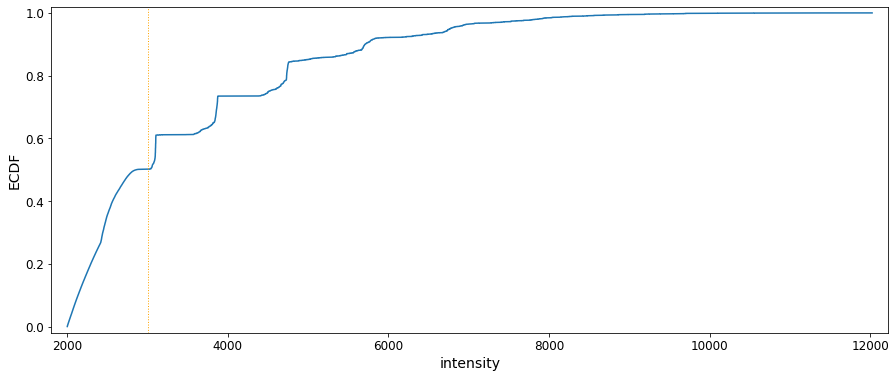

In [6]:
# determine the best clipping value using an ECDF

import statsmodels.api as sm
ecdf = sm.distributions.ECDF(ms1_df[ms1_df.intensity > 2000].intensity)

f, ax1 = plt.subplots()
plt.plot(ecdf.x, ecdf.y)
f.set_figheight(6)
f.set_figwidth(15)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xlabel('intensity', fontsize=14)
plt.ylabel('ECDF', fontsize=14)

plt.axvline(x=3000, linestyle=':', linewidth=1, color='orange')
plt.margins(0.02)
# plt.title("ms1 raw point intensity ECDF")
plt.show()

In [7]:
ecdf(3000)

0.5017161836656537

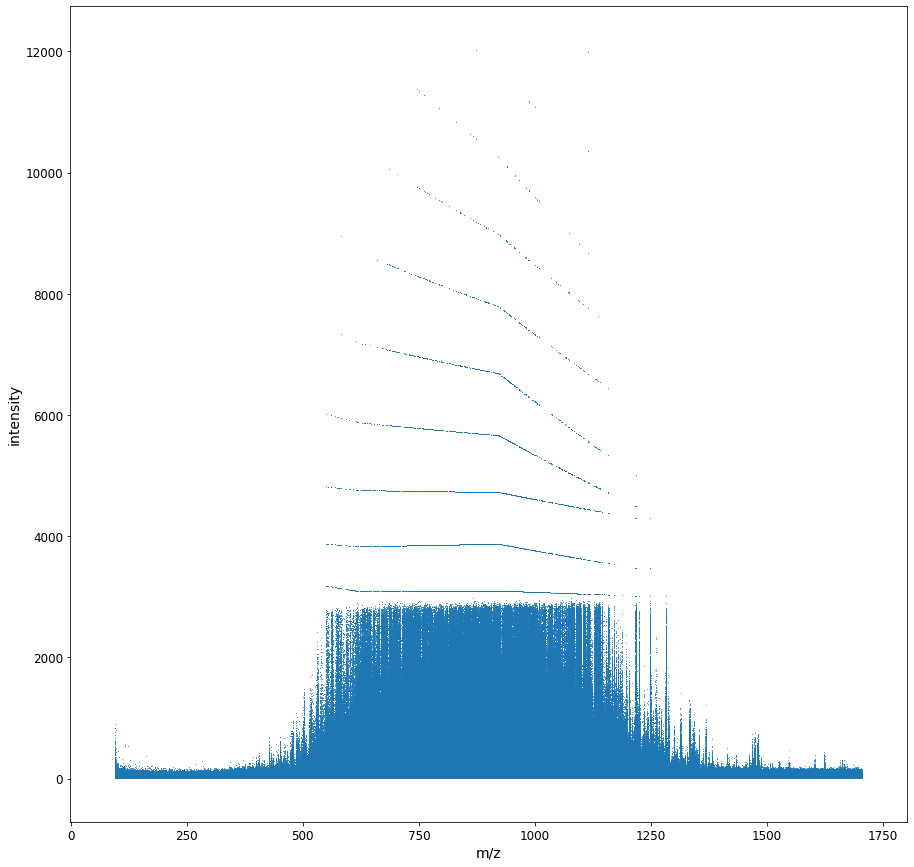

In [8]:
f, ax = plt.subplots()
f.set_figheight(15)
f.set_figwidth(15)

plt.margins(0.06)
plt.title('')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax.scatter(ms1_df.mz, ms1_df.intensity, marker='o', lw=0, s=1, alpha=1.0)

plt.xlabel('m/z', fontsize=14)
plt.ylabel('intensity', fontsize=14)
# plt.ylim((0,910))

# plt.axvline(x=+1, linestyle=':', linewidth=4, color='orange')
# plt.axvline(x=-1, linestyle=':', linewidth=4, color='orange')

plt.show()

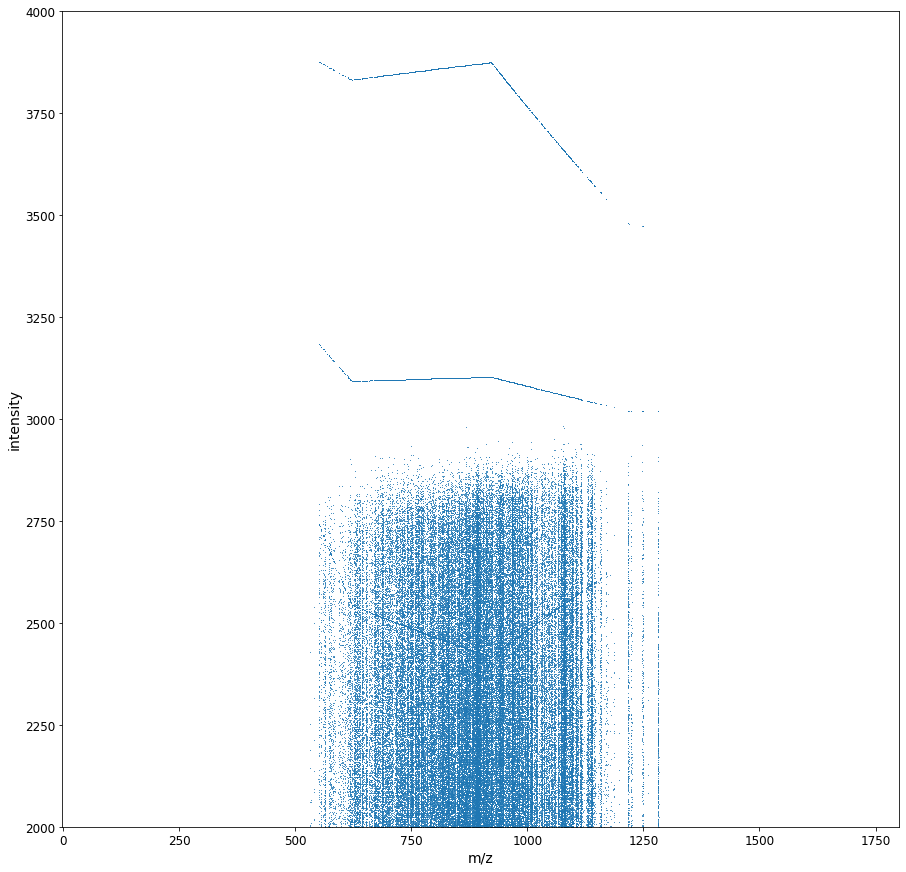

In [10]:
f, ax = plt.subplots()
f.set_figheight(15)
f.set_figwidth(15)

plt.margins(0.06)
plt.title('')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax.scatter(ms1_df.mz, ms1_df.intensity, marker='o', lw=0, s=1, alpha=1.0)

plt.xlabel('m/z', fontsize=14)
plt.ylabel('intensity', fontsize=14)
plt.ylim((2000,4000))

# plt.axvline(x=+1, linestyle=':', linewidth=4, color='orange')
# plt.axvline(x=-1, linestyle=':', linewidth=4, color='orange')

plt.show()